# **Title of Project**

Hand Written Digit Prediction

## **Objective**

The primary objective of this project is to develop a machine learning model capable of accurately recognizing and predicting handwritten digits from the load_digits dataset available in the sklearn.datasets module. This involves:

1. Data Exploration and Preprocessing

2. Model Development and Training

3. Model Evaluation and Validation

## **Data Source**


### sklearn.datasets library

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## **Import Data**

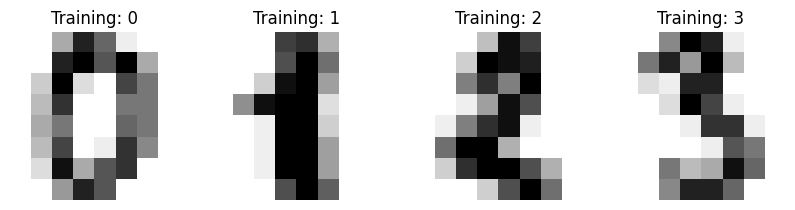

In [7]:
from sklearn.datasets import load_digits
df_bunch = load_digits()
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df_bunch.images, df_bunch.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## **Describe Data**

In [8]:
df = pd.DataFrame(df_bunch.data)
df.describe()


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


## **Data Visualization**

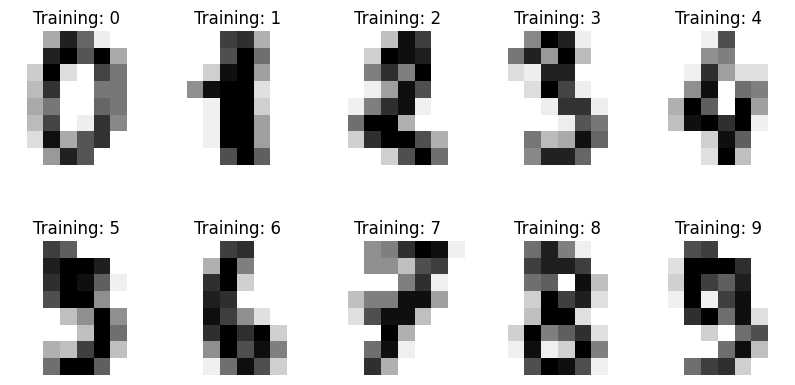

In [39]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, (image, label) in enumerate(zip(df_bunch.images, df_bunch.target[:10])):
    ax = axes[i // 5, i % 5]

    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training: {label}")

plt.show()


## **Data Preprocessing**

In [11]:
df_bunch.images.shape

(1797, 8, 8)

In [12]:
df_bunch.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
df_bunch.images[0].shape

(8, 8)

In [14]:
len(df_bunch.images)

1797

In [15]:
n_samples = len(df_bunch.images)
data = df_bunch.images.reshape((n_samples, -1))

In [16]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
data[0].shape

(64,)

In [18]:
data.shape

(1797, 64)

## Scaling image data

In [19]:
data.min()

0.0

In [20]:
data.max()

16.0

In [21]:
data = data/16

In [22]:
data.min()

0.0

In [23]:
data.max()

1.0

In [24]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## **Define Target Variable (y) and Feature Variables (X)**

### already defined

## **Train Test Split**

In [25]:
from sklearn.model_selection import train_test_split


In [26]:
X_train, X_test, y_train, y_test = train_test_split(data, df_bunch.target, test_size=0.3)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## **Modeling**

## Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier()

In [31]:
rf.fit(X_train, y_train)

RandomForestClassifier()

## **Model Evaluation**

## Model Accuracy

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
confusion_matrix(y_test, y_pred)

array([[56,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 56,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 52,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 67,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 59,  1,  0],
       [ 0,  4,  1,  0,  0,  0,  0,  0, 44,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  2, 43]])

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        57
           1       0.92      1.00      0.96        49
           2       0.98      1.00      0.99        52
           3       0.98      0.98      0.98        57
           4       0.98      1.00      0.99        52
           5       0.99      0.99      0.99        68
           6       0.98      0.98      0.98        50
           7       1.00      0.98      0.99        60
           8       0.92      0.90      0.91        49
           9       1.00      0.93      0.97        46

    accuracy                           0.98       540
   macro avg       0.98      0.97      0.97       540
weighted avg       0.98      0.98      0.98       540



## **Prediction**

In [32]:
y_pred = rf.predict(X_test)

In [33]:
y_pred

array([4, 4, 2, 0, 8, 6, 1, 5, 6, 8, 1, 2, 8, 3, 7, 5, 0, 0, 7, 5, 1, 7,
       7, 5, 1, 5, 4, 0, 4, 6, 4, 8, 2, 6, 4, 3, 8, 6, 9, 4, 8, 3, 4, 1,
       5, 4, 9, 3, 3, 4, 8, 3, 9, 3, 7, 9, 3, 5, 7, 2, 5, 0, 6, 0, 0, 9,
       9, 6, 7, 8, 3, 9, 7, 9, 1, 7, 4, 1, 0, 6, 7, 5, 7, 2, 0, 8, 3, 0,
       6, 2, 3, 1, 3, 9, 9, 5, 2, 2, 0, 5, 0, 7, 5, 5, 2, 9, 0, 2, 0, 3,
       5, 3, 4, 6, 2, 4, 2, 3, 6, 1, 5, 6, 7, 0, 8, 1, 6, 1, 7, 2, 8, 1,
       3, 0, 5, 4, 6, 2, 7, 8, 7, 2, 6, 1, 8, 5, 2, 3, 3, 0, 8, 2, 5, 6,
       7, 7, 7, 5, 3, 7, 0, 6, 4, 5, 1, 9, 3, 0, 2, 1, 1, 3, 6, 7, 4, 9,
       6, 8, 2, 0, 6, 2, 6, 1, 0, 0, 0, 2, 1, 4, 1, 7, 9, 4, 7, 0, 4, 8,
       7, 4, 1, 5, 7, 5, 2, 7, 7, 6, 8, 2, 6, 5, 5, 4, 0, 0, 0, 2, 8, 0,
       8, 5, 0, 1, 3, 1, 2, 5, 2, 7, 1, 1, 7, 0, 1, 1, 8, 5, 3, 0, 8, 0,
       3, 2, 8, 4, 6, 2, 7, 8, 0, 3, 0, 0, 0, 4, 3, 9, 4, 8, 7, 5, 3, 9,
       9, 5, 1, 8, 0, 4, 3, 5, 5, 6, 8, 9, 8, 4, 5, 1, 5, 2, 0, 4, 6, 0,
       2, 3, 5, 7, 2, 0, 3, 8, 3, 2, 5, 8, 1, 3, 3,

## **Explaination**

Data Exploration and Preprocessing:

- Loading Data: The dataset contains images of handwritten digits (0-9) in an 8x8 pixel format. Each image is represented by a 64-dimensional feature vector.
- Normalization: Normalized the pixel values to bring them into a uniform range, which helps in speeding up the convergence of learning algorithms.
- Splitting the Data: Divided the dataset into training and testing sets to evaluate the model's performance on unseen data.
- Visualization: Visualized sample images to understand the nature of the data and the variations in handwritten digits.

Model Development and Training:

- Implemented random forests model
- Trained the model on the training dataset and evaluated their initial performance.

Model Evaluation and Validation:

- Used metrics like accuracy, precision, recall, and F1-score to measure the performance of each model.
- Analyzed confusion matrices to identify common misclassifications and areas for improvement.

